In [ ]:
#1
from google.colab import files
import io
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
import math
from matplotlib import pyplot
import os
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded = files.upload()

Saving Stock Return Data.csv to Stock Return Data.csv


In [ ]:
#2
df = pd.read_csv(io.BytesIO(uploaded['Stock Return Data.csv']))
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12110 entries, 0 to 12109
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    12110 non-null  int64  
 1   Mkt_rf  12110 non-null  float64
 2   Agric   12110 non-null  float64
 3   Food    12110 non-null  float64
 4   Soda    12110 non-null  float64
 5   Beer    12110 non-null  float64
 6   Smoke   12110 non-null  float64
 7   Toys    12110 non-null  float64
 8   Fun     12110 non-null  float64
 9   Books   12110 non-null  float64
 10  Hshld   12110 non-null  float64
 11  Clths   12110 non-null  float64
 12  Hlth    12110 non-null  float64
 13  MedEq   12110 non-null  float64
 14  Drugs   12110 non-null  float64
 15  Chems   12110 non-null  float64
 16  Rubbr   12110 non-null  float64
 17  Txtls   12110 non-null  float64
 18  BldMt   12110 non-null  float64
 19  Cnstr   12110 non-null  float64
 20  Steel   12110 non-null  float64
 21  FabPr   12110 non-null  float64
 22

In [ ]:
#3
df['Mkt_rf_lead'] = df['Mkt_rf'].shift(-1)
df['Mkt_rf_lead']

0        0.59
1       -0.74
2       -0.15
3        0.04
4       -0.31
         ... 
12105   -0.07
12106    0.05
12107    0.22
12108   -0.57
12109     NaN
Name: Mkt_rf_lead, Length: 12110, dtype: float64

In [ ]:
#4
df = df.dropna(how='any')
df['Mkt_rf_lead'][-5:]

12104   -0.07
12105   -0.07
12106    0.05
12107    0.22
12108   -0.57
Name: Mkt_rf_lead, dtype: float64

In [ ]:
#5
X = np.asarray(df.drop(columns=["Date","Mkt_rf","Mkt_rf_lead"], axis=1))
X

array([[ 3.05,  0.83,  0.18, ...,  3.88,  0.82,  4.84],
       [ 3.67,  0.71, -0.68, ...,  2.49, -0.29,  5.07],
       [ 1.38, -0.38,  0.32, ..., -2.06, -1.  , -0.05],
       ...,
       [-0.2 ,  0.03,  0.35, ...,  0.1 , -0.27,  0.04],
       [ 0.32, -0.19,  0.35, ...,  0.52, -0.11,  0.3 ],
       [-0.08,  0.01, -0.71, ...,  0.63,  0.31,  0.28]])

In [ ]:
y = np.asarray(df.filter(items=['Mkt_rf_lead'], axis = 1))
y

array([[ 0.59],
       [-0.74],
       [-0.15],
       ...,
       [ 0.05],
       [ 0.22],
       [-0.57]])

In [ ]:
#6
lr = LinearRegression().fit(X,y)
y_pred = np.asarray(lr.predict(X))
y_pred

array([[-0.05185641],
       [-0.28156738],
       [-0.04285425],
       ...,
       [-0.02640611],
       [ 0.05309793],
       [ 0.00685096]])

In [ ]:
#7
dif=np.subtract(y,y_pred)
dif_sq=np.square(dif)
mse = np.mean(dif_sq)
mse

1.0279229004214308

In [ ]:
mse_check = mean_squared_error(y,y_pred)
mse_check

1.0279229004214308

In [ ]:
#8
rmse=math.sqrt(mse)
rmse

1.0138653265702653

In [ ]:
df.describe()

,Date,Mkt_rf,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,Hlth,MedEq,Drugs,Chems,Rubbr,Txtls,BldMt,Cnstr,Steel,FabPr,Mach,ElcEq,Autos,Aero,Ships,Guns,Gold,Mines,Coal,Oil,Util,Telcm,PerSv,BusSv,Hardw,Softw,Chips,LabEq,Paper,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other,Mkt_rf_lead
count,1.210900e+04,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000,12109.000000
mean,1.993540e+07,0.026597,0.048196,0.052598,0.053045,0.054615,0.070412,0.035436,0.061738,0.041790,0.041346,0.048005,0.039762,0.047479,0.051330,0.051442,0.047927,0.046669,0.047842,0.046022,0.036871,0.034335,0.047501,0.055138,0.040966,0.058553,0.051922,0.062641,0.045580,0.047369,0.050082,0.052017,0.043265,0.046323,0.027770,0.042639,0.043752,0.047340,0.049791,0.047327,0.047012,0.048152,0.048571,0.044142,0.050811,0.049879,0.048750,0.050548,0.022359,0.054912,0.023720,0.026452
std,1.384990e+05,1.024948,1.410585,0.919471,1.436342,1.153675,1.404291,1.483039,1.665084,1.211849,1.096993,1.271938,1.511080,1.185270,1.155435,1.251732,1.151381,1.363150,1.225192,1.581853,1.637325,1.512826,1.314133,1.388356,1.465754,1.348990,1.509458,1.375787,2.367913,1.629541,2.409149,1.360350,0.875819,1.120713,1.313848,1.112190,1.661267,2.190101,1.606245,1.434390,1.114558,1.280491,1.242233,1.057495,1.169080,1.263661,1.441094,1.164317,1.509442,1.467567,1.420245,1.024909
min,1.970010e+07,-17.440000,-15.270000,-16.040000,-19.220000,-14.730000,-13.990000,-18.610000,-24.110000,-19.340000,-21.460000,-18.510000,-15.450000,-15.240000,-18.700000,-17.660000,-16.550000,-18.400000,-17.490000,-15.920000,-23.950000,-15.450000,-18.060000,-19.700000,-19.720000,-18.370000,-13.200000,-19.480000,-23.380000,-16.990000,-19.340000,-19.500000,-12.860000,-16.690000,-14.450000,-16.340000,-21.540000,-20.760000,-17.100000,-18.540000,-20.530000,-21.430000,-17.560000,-13.200000,-18.010000,-15.480000,-16.980000,-13.980000,-16.190000,-16.270000,-17.260000,-17.440000
25%,1.981122e+07,-0.440000,-0.620000,-0.420000,-0.660000,-0.550000,-0.610000,-0.750000,-0.730000,-0.530000,-0.520000,-0.570000,-0.690000,-0.570000,-0.540000,-0.560000,-0.520000,-0.560000,-0.540000,-0.730000,-0.700000,-0.680000,-0.560000,-0.650000,-0.700000,-0.650000,-0.740000,-0.650000,-1.200000,-0.700000,-1.050000,-0.630000,-0.330000,-0.480000,-0.620000,-0.480000,-0.780000,-0.880000,-0.720000,-0.670000,-0.510000,-0.630000,-0.610000,-0.470000,-0.550000,-0.610000,-0.550000,-0.480000,-0.640000,-0.510000,-0.590000,-0.440000
50%,1.993121e+07,0.050000,0.040000,0.060000,0.040000,0.050000,0.050000,0.040000,0.060000,0.050000,0.030000,0.060000,0.070000,0.060000,0.050000,0.050000,0.060000,0.060000,0.060000,0.050000,0.030000,0.040000,0.070000,0.040000,0.020000,0.070000,0.060000,0.050000,-0.060000,0.020000,0.000000,0.050000,0.060000,0.050000,0.040000,0.070000,0.050000,0.050000,0.070000,0.070000,0.060000,0.050000,0.050000,0.080000,0.060000,0.070000,0.050000,0.070000,0.020000,0.060000,0.050000,0.050000
75%,2.005122e+07,0.520000,0.720000,0.540000,0.730000,0.640000,0.760000,0.830000,0.890000,0.620000,0.590000,0.700000,0.800000,0.700000,0.660000,0.680000,0.650000,0.660000,0.650000,0.820000,0.790000,0.750000,0.680000,0.760000,0.790000,0.760000,0.850000,0.770000,1.210000,0.810000,1.120000,0.710000,0.440000,0.590000,0.730000,0.610000,0.870000,0.990000,0.830000,0.770000,0.620000,0.710000,0.690000,0.590000,0.640000,0.710000,0.640000,0.600000,0.700000,0.640000,0.670000,0.520000
max,2

In [ ]:
### Shrinkage with Python
##Lasso 
#alpha = 1
from sklearn import linear_model
las = linear_model.Lasso(alpha=1)
las.fit(X, y)
y_lasso_pred = las.predict(X)
mean_squared_error(y,y_lasso_pred)

1.0503518694865406

In [ ]:
#alpha = 0.1
las2 = linear_model.Lasso(alpha=0.1)
las2.fit(X, y)
y_lasso_pred_2 = las2.predict(X)
mean_squared_error(y,y_lasso_pred_2)

1.0496251769116054

In [ ]:
#alpha = 0.01
las3 = linear_model.Lasso(alpha=0.01)
las3.fit(X, y)
y_lasso_pred_3 = las3.predict(X)
mean_squared_error(y,y_lasso_pred_3)

1.0312636277086589

In [ ]:
##Ridge
#alpha = 1
rid = linear_model.Ridge(alpha=1)
rid.fit(X, y)
y_ridge_pred = rid.predict(X)
mean_squared_error(y,y_ridge_pred)

1.0279229007247566

In [ ]:
#alpha = 0.1
rid2 = linear_model.Ridge(alpha=0.1)
rid2.fit(X, y)
y_ridge_pred_2 = rid2.predict(X)
mean_squared_error(y,y_ridge_pred_2)

1.0279229004244654

In [ ]:
#alpha = 0.01
rid3 = linear_model.Ridge(alpha=0.01)
rid3.fit(X, y)
y_ridge_pred_3 = rid3.predict(X)
mean_squared_error(y,y_ridge_pred_3)

1.0279229004214612

In [ ]:
###Decision Trees With Python
##Simple Decision Tree Model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dtr = tree.DecisionTreeRegressor(min_samples_leaf=100,random_state=42)

In [ ]:
dtr = tree.DecisionTreeRegressor(min_samples_leaf=100,random_state=42).fit(X,y)
y_dtr_pred = dtr.predict(X)
mse_dtr = mean_squared_error(y,y_dtr_pred)

In [ ]:
mse_dtr

0.9718440195526606

[Text(136.60893705463184, 212.49818181818182, 'X[36] <= 0.095\nmse = 1.05\nsamples = 12109\nvalue = 0.026'),
 Text(44.53396674584323, 202.61454545454546, 'X[20] <= -3.415\nmse = 1.259\nsamples = 6187\nvalue = -0.05'),
 Text(38.17197149643705, 192.73090909090908, 'mse = 8.851\nsamples = 139\nvalue = 0.516'),
 Text(50.89596199524941, 192.73090909090908, 'X[43] <= -2.265\nmse = 1.077\nsamples = 6048\nvalue = -0.063'),
 Text(34.99097387173397, 182.84727272727272, 'X[46] <= -1.235\nmse = 2.37\nsamples = 299\nvalue = -0.516'),
 Text(28.628978622327793, 172.96363636363637, 'mse = 2.2\nsamples = 187\nvalue = -0.729'),
 Text(41.35296912114014, 172.96363636363637, 'mse = 2.453\nsamples = 112\nvalue = -0.161'),
 Text(66.80095011876485, 182.84727272727272, 'X[35] <= -3.445\nmse = 0.999\nsamples = 5749\nvalue = -0.04'),
 Text(54.0769596199525, 172.96363636363637, 'X[26] <= -0.635\nmse = 1.576\nsamples = 282\nvalue = -0.328'),
 Text(47.71496437054632, 163.07999999999998, 'mse = 1.811\nsamples = 125\

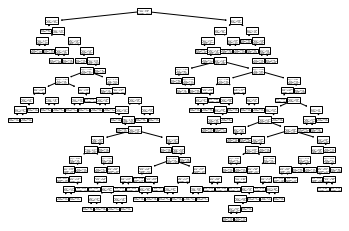

In [ ]:
tree.plot_tree(dtr)

In [ ]:
print ("Height of tree is %d" %(dtr.get_depth()))

Height of tree is 21


In [ ]:
##Random Forest Algorithm
rfr = RandomForestRegressor(random_state=42, n_estimators = 100, min_samples_leaf = 100, max_features = 'sqrt').fit(X,y.ravel())
rfr

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_rfr_pred = rfr.predict(X)
mse_rfr = mean_squared_error(y,y_rfr_pred)
print(y_rfr_pred)
print(mse_rfr)

[ 0.06071997  0.0325297  -0.20253734 ... -0.00568292  0.04701138
  0.02116135]
0.9814334662236628


In [ ]:
###Deep Learning With Python
##Feed-forward Network Model
from sklearn.neural_network import MLPRegressor

In [ ]:
ffnm = MLPRegressor(random_state=42, solver='sgd', max_iter = 10000, activation ='relu', hidden_layer_sizes=(20,10,3))
ffnm

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 10, 3), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
ffnm_fit = ffnm.fit(X,y)
ffnm_fit

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 10, 3), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
y_ffnm_pred = ffnm_fit.predict(X)
mse_ffnm = mean_squared_error(y,y_ffnm_pred)
print(y_ffnm_pred)
print(mse_ffnm)

[-0.08213813  0.01153157 -0.85340376 ... -0.00181    -0.08653385
  0.05280616]
0.8260754410623826
